## K-Nearest Neigbors 

## Import all the necessary libraries

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

## Load the dataset

In [14]:
b_cancer = load_breast_cancer()
X = b_cancer.data
y = b_cancer.target

## Split the dataset in training and testing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Train the model with `k = 1`

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
           
pred = knn.predict(X_test)
print(pred)

[1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1]


## Evaluate the model with `k = 1`

In [9]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[58 10]
 [ 4 99]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        68
           1       0.91      0.96      0.93       103

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



## Choosing the `k` value using the elbow method

Text(0, 0.5, 'Error Rate')

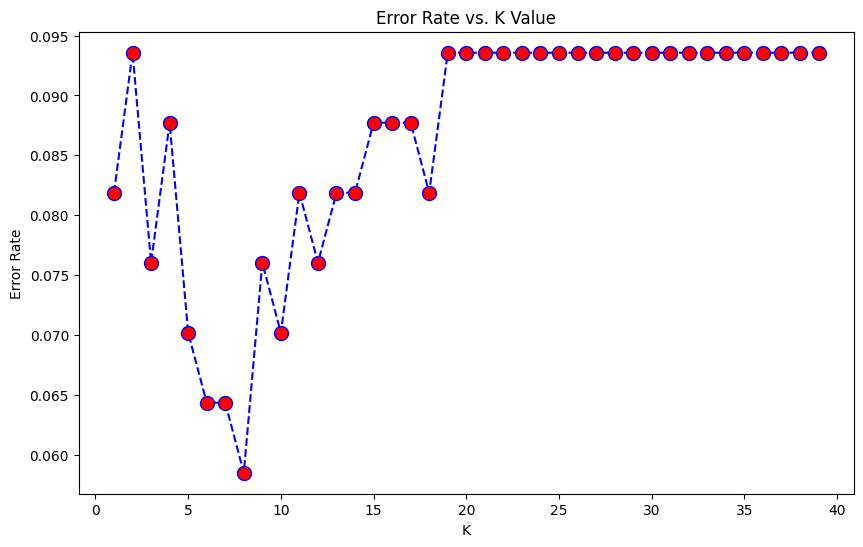

In [15]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))

plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')

plt.xlabel('K')

plt.ylabel('Error Rate')

## Train the model with the new `k` value

In [16]:
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[ 60   8]
 [  2 101]]


              precision    recall  f1-score   support

           0       0.97      0.88      0.92        68
           1       0.93      0.98      0.95       103

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171

